<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Преобразование-категориальных-признаков" data-toc-modified-id="Преобразование-категориальных-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование категориальных признаков</a></span></li><li><span><a href="#Изучение-целевого-признака" data-toc-modified-id="Изучение-целевого-признака-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение целевого признака</a></span></li><li><span><a href="#Разделение-выборки" data-toc-modified-id="Разделение-выборки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Разделение выборки</a></span></li><li><span><a href="#Обучение-модели-без-учёта-дисбаланса" data-toc-modified-id="Обучение-модели-без-учёта-дисбаланса-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение модели без учёта дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-(Logistic-Regression)" data-toc-modified-id="Логистическая-регрессия-(Logistic-Regression)-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Логистическая регрессия (Logistic Regression)</a></span></li><li><span><a href="#Модель-'Дерево-решений'-(Decision-Tree-Classifier)" data-toc-modified-id="Модель-'Дерево-решений'-(Decision-Tree-Classifier)-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Модель 'Дерево решений' (Decision Tree Classifier)</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;-(RandomForestClassifier)" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-(RandomForestClassifier)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Модель "Случайный лес" (RandomForestClassifier)</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Параметр-class_weight-для-борьбы-с-дисбалансом" data-toc-modified-id="Параметр-class_weight-для-борьбы-с-дисбалансом-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Параметр class_weight для борьбы с дисбалансом</a></span></li><li><span><a href="#Увеличение-выборки-(upsampling)" data-toc-modified-id="Увеличение-выборки-(upsampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки (upsampling)</a></span></li><li><span><a href="#Уменьшение-выборки-(Downsampling)" data-toc-modified-id="Уменьшение-выборки-(Downsampling)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки (Downsampling)</a></span></li><li><span><a href="#Порог-классификации" data-toc-modified-id="Порог-классификации-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Порог классификации</a></span></li><li><span><a href="#GridSearchCV" data-toc-modified-id="GridSearchCV-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>GridSearchCV</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Тестирование-модели-Случайный-лес" data-toc-modified-id="Тестирование-модели-Случайный-лес-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование модели Случайный лес</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. В нашем распоряжении данные о поведении клиентов и расторжении договоров с банком. 

- **Цель**

Спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

## Подготовка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# изучим датасет
df=pd.read_csv('/datasets/Churn.csv')
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**В данном датасете 14 колонок: 13 признаков и 1 целевой признак, 10000 строк.**
**Признаки:**

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак:**

- Exited — факт ухода клиента

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Для удобства приведём к нижнему регистру и отделим названия колонок. Есть пропуски в колонке 'tenure'- сколько лет человек является клиентом банка. Это может означать, что человек является клиентом банка меньше года. Переведём в целочисленный тип и заменем пропуски на ноль.

In [4]:
# для удобства приведём к нижнему регистру и отделим названия колонок
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [5]:
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [6]:
# Заполним пропуски и заменим тип данных
df['tenure']=df['tenure'].fillna(0).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# проверим наличие дубликатов
df.duplicated().sum()

0

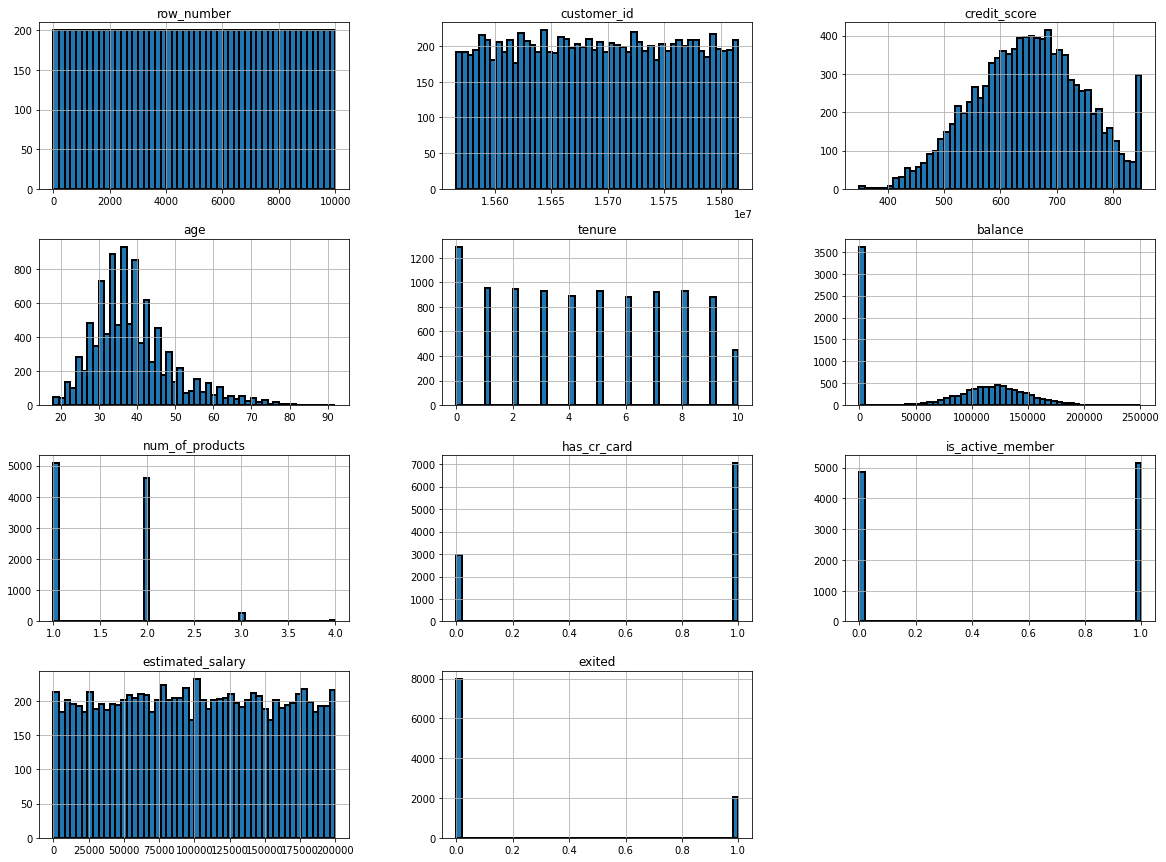

In [9]:
df.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

In [10]:
# в данных присутствуют столбцы, которые не нужны в анализе. Их можно удалить.
data = df.drop(['row_number','customer_id', 'surname'], axis=1).copy()
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Таким образом данные обработаны и готовы к ислледованию.**

## Исследование задачи

### Преобразование категориальных признаков ###

In [11]:
# изучим категориальные признаки
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [12]:
data['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [13]:
# преобразуем категориальные признаки в численные техникой
# One-Hot Encoding
gender_ohe = pd.get_dummies(df["gender"], drop_first=True)
country_ohe = pd.get_dummies(df["geography"], drop_first=True)

# удалим категориальные признаки 
data.drop(["gender", "geography"], axis=1, inplace=True)

# создадим новую таблицу
df_ohe = pd.concat([data, gender_ohe, country_ohe], axis=1)

df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [14]:
# проверим
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   num_of_products   10000 non-null  int64  
 5   has_cr_card       10000 non-null  int64  
 6   is_active_member  10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   exited            10000 non-null  int64  
 9   Male              10000 non-null  uint8  
 10  Germany           10000 non-null  uint8  
 11  Spain             10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


### Изучение целевого признака ###

In [15]:
# изучим целевой признак 
df_ohe['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


In [16]:
df_ohe['exited'].mean()

0.2037

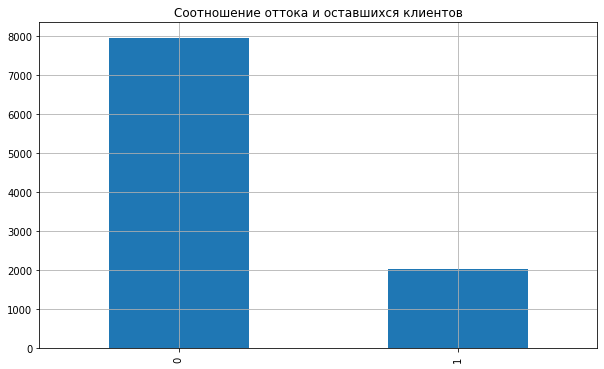

In [17]:
# Посмотрим на график оттока и оставшихся клиентов
df_ohe['exited'].value_counts().plot(kind='bar',grid=True,figsize=(10,6),title='Соотношение оттока и оставшихся клиентов')
plt.show()

In [18]:
# посмотрим на корреляцию признаков
df_ohe.corr()
# Видно, что все признаки не сильно коррелируются с целевым признаком

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,Male,Germany,Spain
credit_score,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.002857,0.005538,0.004780
age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.027544,0.046897,-0.001685
tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,-0.013319,0.014889,0.001676,-0.000745
balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.012087,0.401110,-0.134892
num_of_products,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.021859,-0.010419,0.009039
has_cr_card,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.005766,0.010577,-0.013480
is_active_member,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.022544,-0.020486,0.016732
estimated_salary,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.008112,0.010297,-0.006482
exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.106512,0.173488,-0.052667
Male,-0.002857,-0.027544,0.014889,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,1.000000,-0.024628,0.016889


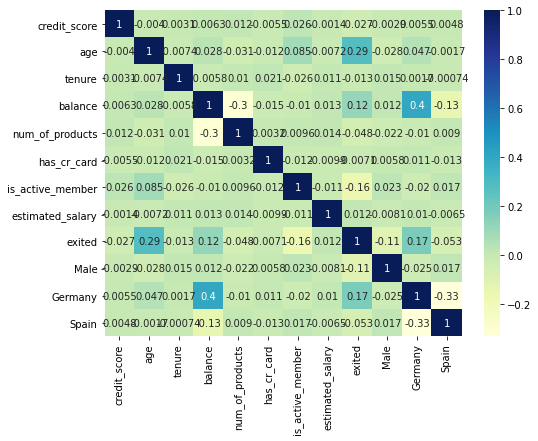

In [19]:
fig,axis = plt.subplots(figsize=(8,6))
axis = sb.heatmap(data=df_ohe.corr(method='pearson',min_periods=1),annot=True,cmap="YlGnBu")


**Наибольшая корреляция наблюдается у целевого признака с возрастом, балансом на счёте и активностью клиента. Положительный факт ухода клиента составляет 20 %. Наблюдается дисбаланс классов. Обучим модель без учёта дисбаланса.**

### Разделение выборки ### 
Разделим выборку на три части: тренировочную, валидационную (для подбора гиперпараметров) и тестовую (на которой будем тестировать модель). Исходные данные разбивают в соотношении 3:1:1 (или 60 %, 20 %, 20 %).

In [20]:
df_train, df_valid_test = train_test_split(df_ohe,train_size=0.6,test_size=0.4,random_state=42)

df_valid,df_test = train_test_split(df_valid_test,test_size=0.5,random_state=42)

In [21]:
df_train.shape

(6000, 12)

In [22]:
df_valid.shape

(2000, 12)

In [23]:
df_test.shape

(2000, 12)

In [24]:
# На базе обучающей выборки формирую датасет признаков 
# serias целевого признака ['exited']
features_train=df_train.drop(['exited'],axis=1)
target_train=df_train['exited']

In [25]:
# На базе валидационной выборки формирую датасет признаков 
# и serias целевого признака ['exited']
features_valid=df_valid.drop(['exited'],axis=1)
target_valid=df_valid['exited']

In [26]:
# На базе тестовой выборки формирую датасет признаков 
# и serias целевого признака ['exited']
features_test=df_test.drop(['exited'],axis=1)
target_test=df_test['exited']

Таким образом, мы разделили наш датасет на три части: обучающую, валидационную и тестовую.
Стандартизируем выборки, т.к есть значения и маленькие и очень большие. 

In [27]:
# Тренировочная выборка
numeric=['credit_score', 'age', 'balance','estimated_salary', 'tenure', 'num_of_products']
scaler=StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Male,Germany,Spain
9761,1.603068,2.027653,-1.457665,-0.048229,0.824078,1,1,-1.452982,0,1,0
3159,1.883194,-1.520072,-0.168647,0.884122,-0.905967,1,0,-1.403696,1,0,0
1489,-0.451185,0.014079,1.120372,1.050751,-0.905967,0,1,1.290549,0,0,0
2987,0.243941,-1.232419,-1.135410,0.517839,-0.905967,0,0,-0.709924,0,1,0
812,-1.416062,-0.561228,-0.490901,-1.214721,0.824078,1,1,-0.736719,0,0,1


In [28]:
# Валидационная выборка
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Male,Germany,Spain
8113,-2.401689,-0.465343,0.475863,0.236000,-0.905967,1,1,-1.542971,1,0,1
1562,0.430691,-0.752997,0.475863,0.529095,0.824078,1,1,-1.416700,1,1,0
5735,-0.700186,0.493501,-0.168647,-1.214721,0.824078,0,1,0.009224,0,0,1
9834,-1.416062,0.685270,0.475863,-0.219909,-0.905967,0,1,1.221533,0,0,0
5379,-0.264435,-1.711841,0.798117,0.368237,-0.905967,1,1,1.177770,0,0,0


In [29]:
# Тестовая выборка
features_test[numeric]=scaler.transform(features_test[numeric])
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Male,Germany,Spain
7072,0.347691,-0.177690,1.442626,0.936984,-0.905967,1,0,-1.275502,1,0,0
6204,-1.602812,-0.561228,-1.135410,1.953238,-0.905967,1,0,-0.546455,1,0,0
7110,0.275066,-1.040650,1.442626,-1.214721,0.824078,0,1,-0.683408,0,0,1
220,0.762692,-0.752997,1.442626,0.619753,0.824078,1,1,-0.052296,0,0,0
69,0.233566,-1.711841,1.120372,0.358327,-0.905967,1,0,-1.438292,0,0,0


### Обучение модели без учёта дисбаланса ###
#### Логистическая регрессия (Logistic Regression) ####

In [30]:
model_LR = LogisticRegression(random_state = 42,solver='liblinear')
model_LR.fit(features_train,target_train) # обучаем
predictions_valid_LR = model_LR.predict(features_valid) # проверяем
accuracy_LR = accuracy_score(target_valid, predictions_valid_LR)
print("F1_LR:", f1_score(target_valid, predictions_valid_LR))
print("ROC_auc_LR:", roc_auc_score(target_valid, predictions_valid_LR))
print('Accuracy:', accuracy_LR)

F1_LR: 0.2967244701348748
ROC_auc_LR: 0.5821799870045484
Accuracy: 0.8175


#### Модель 'Дерево решений' (Decision Tree Classifier) ####

In [31]:
# Циклом ищем лучший гиперпораметр max_depth
best_model_DTC = None
best_depth_DTC = 0
best_result_DTC = 0
for depth in range(1, 20):
    model_DTC = DecisionTreeClassifier(random_state=42, max_depth=depth) # присваиваем модели имя
    model_DTC.fit(features_train,target_train) # обучаем модель
    predictions_DTC = model_DTC.predict(features_valid) # проверяем
    result_DTC =  f1_score(target_valid,predictions_DTC)# посчитайте качество модели
    if result_DTC > best_result_DTC:
        best_model_DTC = model_DTC
        best_result_DTC = result_DTC
        best_depth_DTC = depth
print('best max_depth =',
      best_depth_DTC, 
      '; ', 
      'F1_best_DTC = ', 
      best_result_DTC, 
      end =''
     )
print("ROC_auc_DTC:", roc_auc_score(target_valid, predictions_DTC))

best max_depth = 6 ;  F1_best_DTC =  0.527687296416938ROC_auc_DTC: 0.6712638076673164


Лучшее значение max_depth:6, при котором:

F1_best_DTC =  0.53
ROC_auc_DTC: 0.67

#### Модель "Случайный лес" (RandomForestClassifier) ####

In [32]:
best_model_RFC = None
best_est_RFC= 0
best_depth_RFC= 0
best_result_RFC = 0
for est in range(1, 100, 10):
    for depth in range(1, 20):
        model_RFC = RandomForestClassifier(random_state=42, n_estimators=est, max_depth = depth, min_samples_leaf=5) # обучим модель с заданным количеством деревьев
        model_RFC.fit(features_train, target_train) # обучим модель на тренировочной выборке
        predictions_valid_RFC = model_RFC.predict(features_valid)
        result_RFC = f1_score(target_valid,predictions_valid_RFC)# посчитаем качество модели на валидационной выборке
        if best_result_RFC < result_RFC:
            best_model_RFC = model_RFC
            best_est_RFC = est
            best_depth_RFC = depth
            best_result_RFC = result_RFC
print('best n_estimators =', 
      best_est_RFC, 
      '; ', 
      'best max_depth =', 
      best_depth_RFC, 
      '; ', 
      'F1_best_RFC = ', 
      best_result_RFC, 
      end =''
     ) 

print("ROC_auc_RFC:", roc_auc_score(target_valid, predictions_valid_RFC))

best n_estimators = 71 ;  best max_depth = 16 ;  F1_best_RFC =  0.5652173913043478ROC_auc_RFC: 0.705003248862898


Лучшее значение best n_estimators = 71 ;  best max_depth = 16 ; при которых:

F1_best_RFC =  0.56

ROC_auc_RFC: 0.70

 ***Чтобы улучшить результаты прогнозирования и облегчить обучение модели, мы преобразовали данные:***

- произведено преобразование категориальных признаков
- изучен целевой признак
- удалены ненужные функции - такие как фамилия, идентификатор клиента и номер строки, предполагаемая зарплата
- проведено масштабирование количественных переменных
- разделены выборки в соотношении 60%: 20%: 20% - обучающая, валидационная, для выбора гиперпараметров и верификации модели, тестовая - для окончательной верификации модели и оценки

**Обучены модели без учёта дисбаланса:**

-*Логистическая регрессия (Logistic Regression)*
- F1_LR: 0.30
- ROC_auc_LR: 0.58

-*Модель 'Дерево решений' (Decision Tree Classifier)*
Лучшее значение max_depth:6, при котором:
- F1_best_DTC = 0.53 
- ROC_auc_DTC: 0.67

-*Модель "Случайный лес" (RandomForestClassifier)*
Лучшее значение best n_estimators = 71 ;  best max_depth = 16 ; при которых:
- F1_best_RFC =  0.56
- ROC_auc_RFC: 0.70

***Таким образом лучший результат на текущих обучающих данных без борьбы с дисбалансом классов получены моделью "Случайный лес".
Мы попытались обучить модели на объектах с дисбалансом классов. Теперь давайте попробуем избавиться от этой проблемы***

## Борьба с дисбалансом

In [33]:
# посмотрим на целевой признак еще раз
df_ohe['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


### Параметр class_weight для борьбы с дисбалансом ###

In [34]:
# Рассчитаем модель логистической регреccии с параметром class_weight = 'balanced'
model_LR_CW = LogisticRegression(random_state=42, solver='liblinear',class_weight = 'balanced')
model_LR_CW.fit(features_train, target_train)
predicted__LR_CW = model_LR_CW.predict(features_valid)
print("F1_LR_CW:", f1_score(target_valid, predicted__LR_CW))
print("ROC_auc_LR_CW:", roc_auc_score(target_valid, predicted__LR_CW))

F1_LR_CW: 0.4655623365300785
ROC_auc_LR_CW: 0.6969948018193632


In [35]:
# Рассчитаем модель 'Дерево решений' с параметром class_weight = 'balanced'
# Циклом ищем лучший гиперпораметр max_depth
best_model_DTC_CW = None
best_depth_DTC_CW = 0
best_result_DTC_CW = 0
for depth in range(1, 20):
    model_DTC_CW = DecisionTreeClassifier(random_state=42, max_depth=depth, class_weight='balanced') # присваиваем модели имя
    model_DTC_CW.fit(features_train,target_train) # обучаем модель
    predictions_DTC_CW = model_DTC_CW.predict(features_valid) # проверяем
    result_DTC_CW =  f1_score(target_valid,predictions_DTC_CW)# посчитайте качество модели
    if result_DTC_CW > best_result_DTC_CW:
        best_model_DTC_CW = model_DTC_CW
        best_result_DTC_CW = result_DTC_CW
        best_depth_DTC_CW = depth
print('best max_depth =',
      best_depth_DTC_CW, 
      '; ', 
      'F1_best_DTC_CW = ', 
      best_result_DTC_CW, 
      end =''
     )
print("ROC_auc_DTC_CW:", roc_auc_score(target_valid, predictions_DTC_CW))

best max_depth = 7 ;  F1_best_DTC_CW =  0.5329153605015674ROC_auc_DTC_CW: 0.6645873944119558


In [36]:
# Рассчитаем модель "Случайный лес" (RandomForestClassifier) 
# с параметром class_weight = 'balanced'
# подберём гиперпараметры
best_model_RFC_CW = None
best_est_RFC_CW= 0
best_depth_RFC_CW= 0
best_result_RFC_CW = 0
for est in range(1, 100, 10):
    for depth in range(1, 20):
        model_RFC_CW = RandomForestClassifier(random_state=42, n_estimators=est, 
                                              max_depth = depth, min_samples_leaf=5, 
                                              class_weight='balanced') # обучим модель с заданным количеством деревьев
        model_RFC_CW.fit(features_train, target_train) # обучим модель на тренировочной выборке
        predictions_valid_RFC_CW = model_RFC_CW.predict(features_valid)
        result_RFC_CW = f1_score(target_valid,predictions_valid_RFC_CW)# посчитаем качество модели на валидационной выборке
        if best_result_RFC_CW < result_RFC_CW:
            best_model_RFC_CW = model_RFC_CW
            best_est_RFC_CW = est
            best_depth_RFC_CW = depth
            best_result_RFC_CW = result_RFC_CW
print('best n_estimators =', 
      best_est_RFC_CW, 
      '; ', 
      'best max_depth =', 
      best_depth_RFC_CW, 
      '; ', 
      'F1_best_RFC_CW = ', 
      best_result_RFC_CW, 
      end =''
     ) 

print("ROC_auc_RFC_CW:", roc_auc_score(target_valid, predictions_valid_RFC_CW))

best n_estimators = 31 ;  best max_depth = 13 ;  F1_best_RFC_CW =  0.5933503836317134ROC_auc_RFC_CW: 0.7459876543209877


***Таким образом, при подборе гиперпараметров и применении гиперпараметра class_weight = 'balanced' для борьбы с дисбалансом классов модели показали:***

- *Модель логистической регрессии показала результат по f1 0.46 и roc_auc 0.69, что значительно лучше, чем без данного гиперпараметра.*
- *Модель 'Дерево решений' (Decision Tree Classifier) при лучшем значение max_depth:7 F1: 0.53, ROC_auc: 0.66. Результат по метрикам так же лучше результата без применения гиперпараметра class_weight = 'balanced'.*
- *Модель случайного леса лучшее значение best n_estimators = 31 ; best max_depth = 13 ; показала результат по f1 0,59 и roc_auc 0,74. Результат по метрикам случайного леса так же лучше результата без применения гиперпараметра class_weight = 'balanced'.*

***Таким образом лучший результат на текущих обучающих данных с применением гиперпараметра class_weight = 'balanced' получены также моделью "Случайный лес".*** 

### Увеличение выборки (upsampling) ###

Преобразование проходит в несколько этапов:
- Разделить обучающую выборку на объекты по классам;
- Определить тот класс, который содержит меньше объектов. Назовём его меньшим классом;
- Скопировать несколько раз объекты меньшего класса;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные.

In [37]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=42)
    target_upsampled = shuffle(target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

    
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9681, 11)
(9681,)


In [38]:
# сравним доли классов при таком значении repeat.
target_upsampled.value_counts(normalize = 1)

1    0.506972
0    0.493028
Name: exited, dtype: float64

In [39]:
# Модель логистической регрессии
model_LR_up= LogisticRegression(random_state=42, solver='liblinear')
model_LR_up.fit(features_upsampled, target_upsampled)
predicted_LR_up = model_LR_up.predict(features_valid)
print("F1_LR_up:", f1_score(target_valid, predicted_LR_up))
print("ROC_auc_LR_up:", roc_auc_score(target_valid, predicted_LR_up))
# видим улучшение значений метрики, практически такое же
# как с гиперпараметром class_weight

F1_LR_up: 0.46786632390745503
ROC_auc_LR_up: 0.7005685510071474


In [40]:
# Рассчитаем модель 'Дерево решений'
# Циклом ищем лучший гиперпораметр max_depth
best_model_DTC_up = None
best_depth_DTC_up = 0
best_result_DTC_up = 0
for depth in range(1, 20):
    model_DTC_up = DecisionTreeClassifier(random_state=42, max_depth=depth) # присваиваем модели имя
    model_DTC_up.fit(features_upsampled, target_upsampled) # обучаем модель
    predictions_DTC_up = model_DTC_up.predict(features_valid) # проверяем
    result_DTC_up =  f1_score(target_valid,predictions_DTC_up)# посчитайте качество модели
    if result_DTC_up > best_result_DTC_up:
        best_model_DTC_up = model_DTC_up
        best_result_DTC_up = result_DTC_up
        best_depth_DTC_up = depth
print('best max_depth =',
      best_depth_DTC_up, 
      '; ', 
      'F1_best_DTC_up = ', 
      best_result_DTC_up, 
      end =''
     )
print("ROC_auc_DTC_up:", roc_auc_score(target_valid, predictions_DTC_up))
# видим улучшение значений метрики, практически такое же
# как с гиперпараметром class_weight

best max_depth = 7 ;  F1_best_DTC_up =  0.5338894681960376ROC_auc_DTC_up: 0.6642137751786874


In [41]:
# Модель случайный лес
best_model_RFC_up = None
best_est_RFC_up= 0
best_depth_RFC_up= 0
best_result_RFC_up = 0
for est in range(1, 100, 10):
    for depth in range(1, 20):
        model_RFC_up = RandomForestClassifier(random_state=42, 
                                              n_estimators=est, 
                                              max_depth = depth,
                                              min_samples_leaf=5) # обучим модель с заданным количеством деревьев
        model_RFC_up.fit(features_upsampled, target_upsampled) # обучим модель на тренировочной выборке
        predictions_valid_RFC_up = model_RFC_up.predict(features_valid)
        result_RFC_up = f1_score(target_valid,predictions_valid_RFC_up)# посчитаем качество модели на валидационной выборке
        if best_result_RFC_up < result_RFC_up:
            best_model_RFC_up = model_RFC_up
            best_est_RFC_up = est
            best_depth_RFC_up = depth
            best_result_RFC_up = result_RFC_up
print('best n_estimators =', 
      best_est_RFC_up, 
      '; ', 
      'best max_depth =', 
      best_depth_RFC, 
      '; ', 
      'F1_best_RFC_up = ', 
      best_result_RFC_up, 
      end =''
     ) 

print("ROC_auc_RFC_up:", roc_auc_score(target_valid, predictions_valid_RFC_up))

best n_estimators = 31 ;  best max_depth = 16 ;  F1_best_RFC_up =  0.5807228915662651ROC_auc_RFC_up: 0.7462475633528266


**Таким образом лучший результат на текущих обучающих данных, при увеличении выборки, получены также моделью "Случайный лес".**

### Уменьшение выборки (Downsampling) ###

Вместо повторения объектов меньшего класса, уберём часть обектов
большего класса. Это можно сделать техникой downsampling.
Преобразование проходит в несколько этапов:
- Разделить обучающую выборку на объекты по классам;
- Определить тот класс, который содержит больше объектов. Назовём его большим классом;
- Случайным образом отбросить часть из объектов большего класса;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные.

In [42]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_sample = features_zeros.sample(frac=0.26, random_state=42)
    target_sample = target_zeros.sample(frac=0.26, random_state=42)
    
    features_downsampled = pd.concat([features_sample] + [features_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=42)
    target_downsampled = shuffle(target_downsampled, random_state=42)
    

    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train,0.26)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2468, 11)
(2468,)


In [43]:
# сравним доли классов при таком значении fraction.
target_downsampled.value_counts(normalize = 1)

0    0.502836
1    0.497164
Name: exited, dtype: float64

In [44]:
# Модель логистической регрессии
model_LR_down = LogisticRegression(random_state=42, solver='liblinear')
model_LR_down.fit(features_downsampled, target_downsampled)
predicted_LR_down = model_LR_down.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_LR_down))
print("ROC_auc_LR_down:", roc_auc_score(target_valid, predicted_LR_down))
# получаем значение метрик меньше, чем при  увеличении выборки

F1: 0.4642233856893543
ROC_auc_LR_down: 0.695679012345679


In [45]:
# Рассчитаем модель 'Дерево решений'
# Циклом ищем лучший гиперпораметр max_depth
best_model_DTC_down = None
best_depth_DTC_down = 0
best_result_DTC_down = 0
for depth in range(1, 20):
    model_DTC_down = DecisionTreeClassifier(random_state=42, max_depth=depth) # присваиваем модели имя
    model_DTC_down.fit(features_downsampled, target_downsampled) # обучаем модель
    predictions_DTC_down = model_DTC_down.predict(features_valid) # проверяем
    result_DTC_down =  f1_score(target_valid,predictions_DTC_down)# посчитайте качество модели
    if result_DTC_down > best_result_DTC_down:
        best_model_DTC_down = model_DTC_down
        best_result_DTC_down = result_DTC_down
        best_depth_DTC_down = depth
print('best max_depth =',
      best_depth_DTC_down, 
      '; ', 
      'F1_best_DTC_down = ', 
      best_result_DTC_down,
       end =''
     )
print("ROC_auc_DTC_down:", roc_auc_score(target_valid, predictions_DTC_down))
# получаем значение метрик меньше, чем при  увеличении выборки

best max_depth = 6 ;  F1_best_DTC_down =  0.5227963525835866ROC_auc_DTC_down: 0.6821312540610786


In [46]:
# Модель случайный лес
best_model_RFC_down = None
best_est_RFC_down= 0
best_depth_RFC_down= 0
best_result_RFC_down = 0
for est in range(1, 100, 10):
    for depth in range(1, 20):
        model_RFC_down = RandomForestClassifier(random_state=42, 
                                              n_estimators=est, 
                                              max_depth = depth,
                                              min_samples_leaf=5) # обучим модель с заданным количеством деревьев
        model_RFC_down.fit(features_downsampled, target_downsampled) # обучим модель на тренировочной выборке
        predictions_valid_RFC_down = model_RFC_down.predict(features_valid)
        result_RFC_down = f1_score(target_valid,predictions_valid_RFC_down)# посчитаем качество модели на валидационной выборке
        if best_result_RFC_down < result_RFC_down:
            best_model_RFC_down = model_RFC_down
            best_est_RFC_down = est
            best_depth_RFC_down = depth
            best_result_RFC_down = result_RFC_down
print('best n_estimators =', 
      best_est_RFC_down, 
      '; ', 
      'best max_depth =', 
      best_depth_RFC_down, 
      '; ', 
      'F1_best_RFC_down= ', 
      best_result_RFC_down, 
      end =''
     ) 

print("ROC_auc_RFC_down:", roc_auc_score(target_valid, predictions_valid_RFC_down))
# получаем значение метрик меньше, чем при  увеличении выборки

best n_estimators = 61 ;  best max_depth = 16 ;  F1_best_RFC_down=  0.5603190428713859ROC_auc_RFC_down: 0.7587719298245614


**Таким образом, модели показали хуже результат метрик, при уменьшении выборки, чем при увеличении (Upsampling). Лучшей моделью стала модель дерева решений.**

### Порог классификации ###

По умолчанию он равен 0,5 - давайте попробуем разные параметры, например, до 0,95

Threshold = 0.00 | Precision = 0.190, Recall = 1.000 | F1-score = 0.319
Threshold = 0.05 | Precision = 0.207, Recall = 0.979 | F1-score = 0.342
Threshold = 0.10 | Precision = 0.247, Recall = 0.905 | F1-score = 0.388
Threshold = 0.15 | Precision = 0.293, Recall = 0.808 | F1-score = 0.431
Threshold = 0.20 | Precision = 0.336, Recall = 0.711 | F1-score = 0.456
Threshold = 0.25 | Precision = 0.375, Recall = 0.584 | F1-score = 0.457
Threshold = 0.30 | Precision = 0.432, Recall = 0.492 | F1-score = 0.460
Threshold = 0.35 | Precision = 0.456, Recall = 0.400 | F1-score = 0.426
Threshold = 0.40 | Precision = 0.504, Recall = 0.339 | F1-score = 0.406
Threshold = 0.45 | Precision = 0.511, Recall = 0.255 | F1-score = 0.340
Threshold = 0.50 | Precision = 0.554, Recall = 0.203 | F1-score = 0.297
Threshold = 0.55 | Precision = 0.633, Recall = 0.163 | F1-score = 0.259
Threshold = 0.60 | Precision = 0.650, Recall = 0.103 | F1-score = 0.177
Threshold = 0.65 | Precision = 0.634, Recall = 0.068 | F1-score 

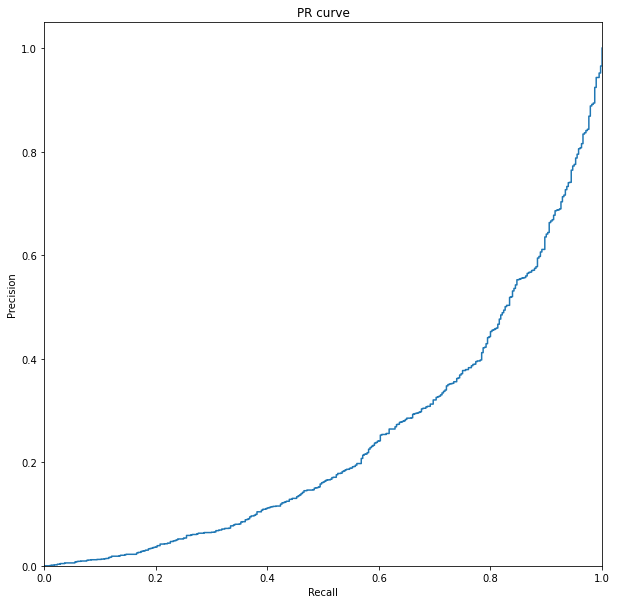

In [47]:
# Модель логистической регрессии
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(threshold, precision, recall, f1))

precision, recall, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

**Самое высокое значение F1-score = 0.459 наблюдается при пороге 0,30.**

Threshold = 0.00 | Precision = 0.188, Recall = 0.982 | F1-score = 0.316
Threshold = 0.05 | Precision = 0.251, Recall = 0.929 | F1-score = 0.395
Threshold = 0.10 | Precision = 0.365, Recall = 0.789 | F1-score = 0.499
Threshold = 0.15 | Precision = 0.373, Recall = 0.784 | F1-score = 0.506
Threshold = 0.20 | Precision = 0.380, Recall = 0.758 | F1-score = 0.507
Threshold = 0.25 | Precision = 0.584, Recall = 0.524 | F1-score = 0.552
Threshold = 0.30 | Precision = 0.584, Recall = 0.524 | F1-score = 0.552
Threshold = 0.35 | Precision = 0.585, Recall = 0.524 | F1-score = 0.553
Threshold = 0.40 | Precision = 0.637, Recall = 0.466 | F1-score = 0.538
Threshold = 0.45 | Precision = 0.692, Recall = 0.426 | F1-score = 0.528
Threshold = 0.50 | Precision = 0.692, Recall = 0.426 | F1-score = 0.528
Threshold = 0.55 | Precision = 0.692, Recall = 0.426 | F1-score = 0.528
Threshold = 0.60 | Precision = 0.810, Recall = 0.337 | F1-score = 0.476
Threshold = 0.65 | Precision = 0.836, Recall = 0.334 | F1-score 

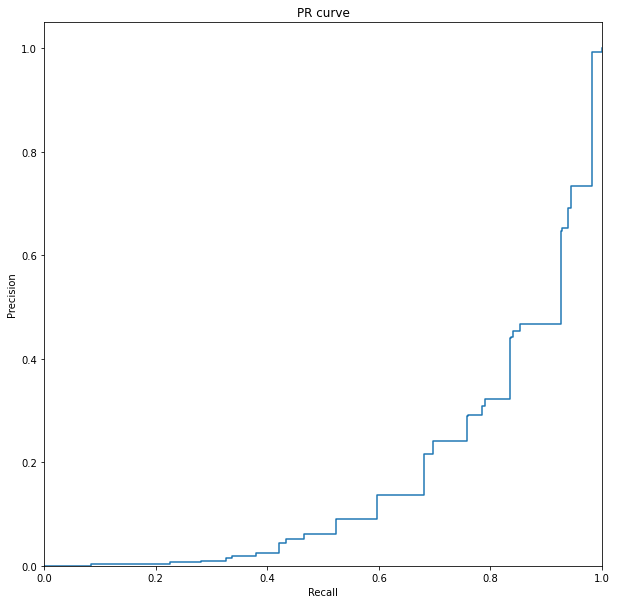

In [48]:
# Рассчитаем модель 'Дерево решений' 
# Рассчитаем модель 'Дерево решений' 
model = DecisionTreeClassifier(random_state=42, max_depth = 6) # присваиваем модели имя
model.fit(features_train, target_train) # обучаем модель
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):  
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(threshold, precision, recall, f1))

precision, recall, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

**Самое высокое значение F1-score = 0.553 наблюдается при пороге 0,35, при глубине дерева 6.**

Threshold = 0.00 | Precision = 0.190, Recall = 1.000 | F1-score = 0.319
Threshold = 0.05 | Precision = 0.221, Recall = 0.976 | F1-score = 0.360
Threshold = 0.10 | Precision = 0.286, Recall = 0.924 | F1-score = 0.437
Threshold = 0.15 | Precision = 0.358, Recall = 0.829 | F1-score = 0.500
Threshold = 0.20 | Precision = 0.430, Recall = 0.747 | F1-score = 0.546
Threshold = 0.25 | Precision = 0.512, Recall = 0.689 | F1-score = 0.587
Threshold = 0.30 | Precision = 0.577, Recall = 0.600 | F1-score = 0.588
Threshold = 0.35 | Precision = 0.646, Recall = 0.547 | F1-score = 0.593
Threshold = 0.40 | Precision = 0.700, Recall = 0.492 | F1-score = 0.578
Threshold = 0.45 | Precision = 0.741, Recall = 0.453 | F1-score = 0.562
Threshold = 0.50 | Precision = 0.796, Recall = 0.411 | F1-score = 0.542
Threshold = 0.55 | Precision = 0.863, Recall = 0.347 | F1-score = 0.495
Threshold = 0.60 | Precision = 0.887, Recall = 0.289 | F1-score = 0.437
Threshold = 0.65 | Precision = 0.922, Recall = 0.247 | F1-score 

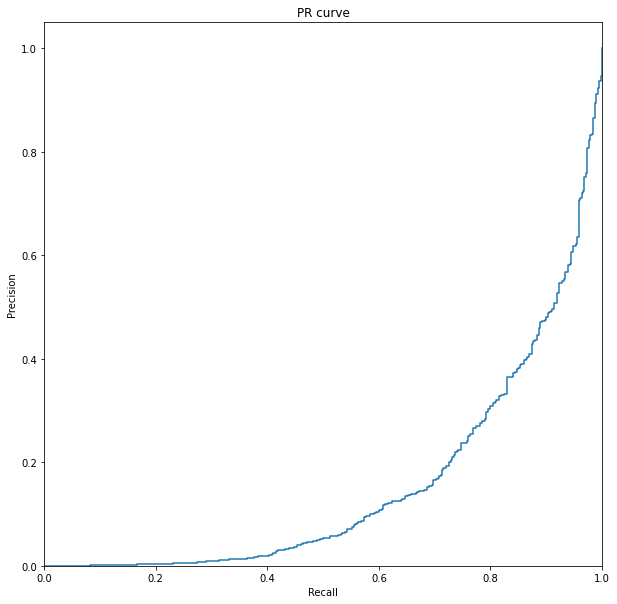

In [49]:
# Модель случайный лес
model = RandomForestClassifier(random_state=42, n_estimators=41, max_depth = 9, min_samples_leaf=5)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))

precision, recall, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

**Самое высокое значение F1-score = 0.593 наблюдается при пороге 0,30.**

### GridSearchCV ###

In [50]:
# Попробуем подобрать параметры для разных моделей
# Логистическая регрессия
par_grid_logist = {
                   'intercept_scaling': [0.5, 1.0, 1.5],
                   'class_weight': [None, 'balanced'],
                   'C': [0.5, 1, 1.5]
                   }
model = LogisticRegression(solver='liblinear',random_state=42)

grid_search = GridSearchCV(model, par_grid_logist, cv=5,
                           scoring='f1')
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': [None, 'balanced'],
                         'intercept_scaling': [0.5, 1.0, 1.5]},
             scoring='f1')

In [51]:
grid_search.best_params_

{'C': 0.5, 'class_weight': None, 'intercept_scaling': 1.0}

In [52]:
# применем параметры и посмотрим на результат
model_lreg = LogisticRegression(C=1.5, class_weight=None, intercept_scaling=0.5,
                                solver='liblinear', random_state=42
)
model_lreg.fit(features_upsampled, target_upsampled)
predicted_valid = model_lreg.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.46786632390745503


**Ниже порога 0.59 давайте посмотрим, как модель будет вести себя во время тестирования.**

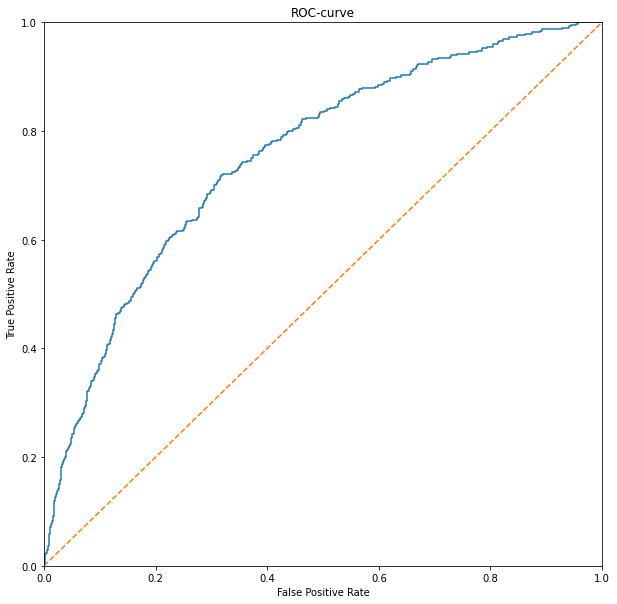

AUC: 0.7540220922677064


In [53]:
probabilities_valid = model_lreg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

**AUC больше 0,5, наша модель лучше, чем случайная и показывает лучшее значение метрики**

In [54]:
# Модель дерево решений
par_grid_DT = {
                     'criterion': ['gini', 'entropy'],
                     'max_depth': np.arange(1, 20)
              }
model_grid_DT = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(model_grid_DT, par_grid_DT, cv=5,
                           scoring='f1'
                          )
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='f1')

In [55]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 19}

In [56]:
model_DTC = DecisionTreeClassifier(max_depth=19, random_state=42,
                                   criterion='gini')
model_DTC.fit(features_upsampled, target_upsampled)
predicted_valid = model_DTC.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.45513654096228867


**Ниже порога 0.59 давайте посмотрим, как модель будет вести себя во время тестирования.**

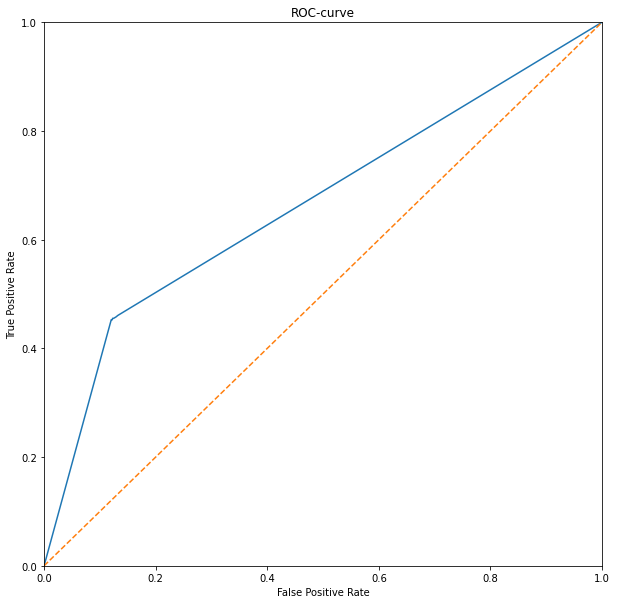

AUC: 0.6663897011046134


In [57]:
probabilities_valid = model_DTC.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

**AUC больше 0,5, наша модель лучше, чем случайная, хуже,чем логистическая регрессия.**

In [58]:
# Модель случайный лес
par_grid_ensemble = {'n_estimators': [3, 10, 30],
                     'criterion': ['gini', 'entropy'],
                     'min_samples_split': range(5, 15)
                    }
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, par_grid_ensemble, cv=5,
                           scoring='f1'
                          )
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(5, 15),
                         'n_estimators': [3, 10, 30]},
             scoring='f1')

In [59]:
grid_search.best_params_

{'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 30}

In [60]:
model_rfc = RandomForestClassifier(random_state=42, criterion='gini', 
                               min_samples_split=5, n_estimators=30
                              )
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid = model_rfc.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5737931034482758


**Ниже порога 0.59 давайте посмотрим, как модель будет вести себя во время тестирования.**

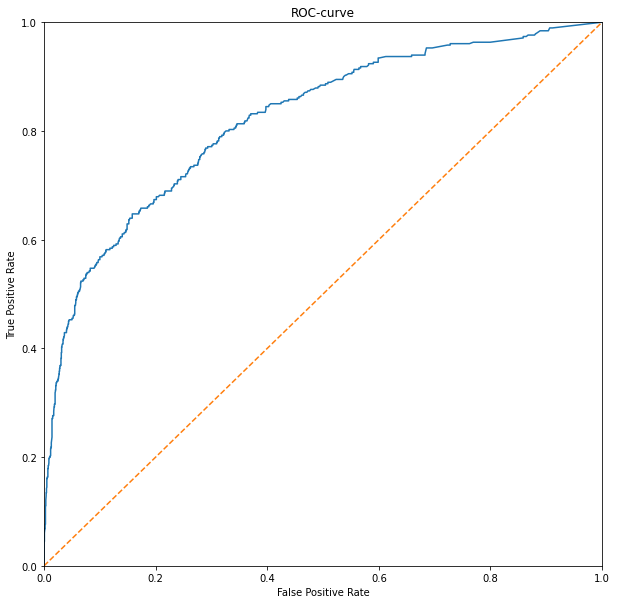

AUC: 0.8210964912280702


In [61]:
probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

**AUC больше 0,5, наша модель лучше, чем случайная, лучше,чем логистическая регрессия.**
**Таким образом, наилучшая модель Случайный лес (F1: 0.57, AUC: 0.82). Протестируем модель, применяя подбор гиперпараметров GridSearchCV.**

## Тестирование модели

### Тестирование модели Случайный лес ###

In [62]:
predictions_test = model_rfc.predict(features_test)
test_f1 = f1_score(target_test, predictions_test)
roc_auc_test = roc_auc_score(target_test, predictions_test)

print("F1-мера")
print("Test set:", test_f1)
print("ROC_auc")
print("Test set:", roc_auc_test)

F1-мера
Test set: 0.6070528967254408
ROC_auc
Test set: 0.7410605836172418


**Итак, результат был получен на Случайном лесу, порог оценки F1 больше 0,59 балла:**
- F1-мера Test set: 0.61, 
- ROC_auc Test set: 0.74 

## Общий вывод ##

**Итак, изучив полученные данные,обработали их и подготовили к исследованию. Произвели преобразование категориальных признаков. Изучили целевой признак,
удалили ненужные столбцы. Масштабировали количественные переменные. Изучили корреляцию, заметили, что наибольшая корреляция наблюдается у целевого признака с возрастом, балансом на счёте и активностью клиента. Наблюдается дисбаланс классов. Разделили выборку на три части: тренировочную, валидационную (для подбора гиперпараметров) и тестовую (на которой будем тестировать модель). Обучили модель без учёта дисбаланса. Получили результаты:**

*- Логистическая регрессия (Logistic Regression)*
- F1_LR: 0.29
- ROC_auc_LR: 0.58

*- Модель 'Дерево решений' (Decision Tree Classifier) Лучшее значение max_depth:6, при котором:* 
- F1_best_DTC = 0.52
- ROC_auc_DTC: 0.67

*- Модель "Случайный лес" (RandomForestClassifier)Лучшее значение best n_estimators = 71 ; best max_depth = 16 при которых:*
- F1_best_RFC = 0.56
- ROC_auc_RFC: 0.70

**Борьба с дисбалансом**

При применении гиперпараметра class_weight = 'balanced' для борьбы с дисбалансом классов модели показали:

 *- Модель логистической регрессии показала результат, который значительно лучше, чем без данного гиперпараметра.*
- f1 0.46
- roc_auc 0.69

*- Модель 'Дерево решений' (Decision Tree Classifier) при лучшем значение max_depth:7*
- F1: 0.53
- ROC_auc: 0.66. 

*- Модель случайного леса лучшее значение best n_estimators = 31 ; best max_depth = 16 показала результат:*
- f1 0,58
- roc_auc 0,74. 

**Таким образом лучший результат на текущих обучающих данных с применением гиперпараметра class_weight = 'balanced' получены также моделью "Случайный лес".**

**Увеличение выборки (upsampling)**

*- Модель логистической регрессии*
- F1_LR_up: 0.46
- ROC_auc_LR_up: 0.70

*- Модель 'Дерево решений'*
- F1_DT_up: 0.53
- ROC_auc_DT_up: 0.66

*- Модель случайный лес*
- F1: 0.58
- ROC_auc_RF_up: 0.74

**Таким образом лучший результат на текущих обучающих данных, при увеличении выборки, получены также моделью "Случайный лес". Результат с увеличением выборки почти такой же, как и при применении гиперпараметра class_weight = 'balanced'.**

**Уменьшение выборки (Downsampling)**

*- Модель логистической регрессии*
- F1: 0.46
- ROC_auc_LR_down: 0.69

*- Модель 'Дерево решений'*
- F1_DT_down: 0.52
- ROC_auc_DT_down: 0.68

*- Модель случайный лес*
- F1_RF_down: 0.56
- ROC_auc_RF_down: 0.75

**Таким образом, модели показали почти такой же результат метрик, при уменьшении выборки, как и при увеличении (Upsampling).**

**Порог классификации**

*- Модель логистической регрессии*
 - Самое высокое значение F1-score = 0.46 наблюдается при пороге 0,30.

*- Модель 'Дерево решений'*
- Самое высокое значение F1-score = 0.55 наблюдается при пороге 0,35.

*- Модель случайный лес*
- Самое высокое значение F1-score = 0.59 наблюдается при пороге 0,30.

**Изменение порога классификации показал лучший результат, по сравнению с остальными способами борьбы с дисбалансом.**

**GridSearchCV**

*-Логистическая регрессия*
- F1: 0.46
- AUC_Roc: 0.75

*- Модель дерево решений*
- F1: 0.45
-  AUC_roc: 0.66

*- Модель случайный лес*
- F1: 0.57
- AUC: 0.82

**Таким образом, лучший результат метрик модель Случайный лес показала при подборе параметров, методом GridSearchCV. Порог оценки F1 больше 0,59 балла:**
- F1-мера Test set: 0.61
- ROC_auc Test set: 0.74